# Случайность в вероятности и на практике

О подходах к понятию случайности: 

Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. 
https://www.mccme.ru/free-books/shen/kolmbook.pdf

А.Н. Ширяев. Случайность в вероятности (доклад на семинаре кафедры теории веротяностей). http://www.mathnet.ru:8080/PresentFiles/21897/bsk_2018_10_17_shiryaev_an_randomness_in_probability_slides.pdf

## Генераторы случайных чисел

Что происходит при вызове, напрмер, ```np.random.rand()```?

Как устроен источник случайной последовательности?

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Рассмотрим простой и популрный алгоритм - Linear congruential generator (LCG). При вызове функции ```rand()``` в C/C++ происзодит обращение именно к LCG.

Linear congruential generator производит последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Число $z_0$ называется *seed* и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG:

In [2]:

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Выведем несколько первых элементов последовательности:

In [0]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать наобум, это может привести к неожиданным последствиям:

In [0]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Гистограмма распределения похожа на равномерное:

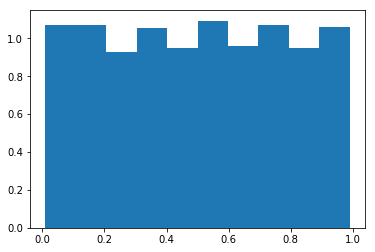

In [0]:
import matplotlib.pyplot as plt
plt.hist(random, normed=True)
plt.show()

Однако, спектральный тест показывает, что точки располагаются на гиперплоскостях, что плохо согласуется с предствалением о случайности:

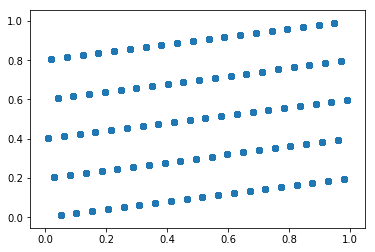

In [0]:
plt.scatter(random[1:], random[:-1])
plt.show()

Более аккуратный выбор параметров приводит с более "случайному" распределению:

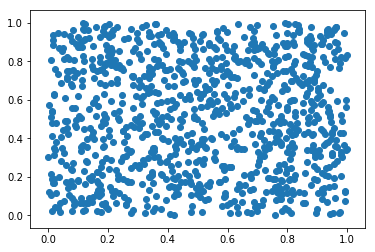

In [0]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Существует набор тестов для проверки "случайности". Например, тесты [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

Больше методов генерации собрано [здесь](https://en.wikipedia.org/wiki/List_of_random_number_generators).

## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

In [37]:
# Solution here
# random.randint(0,9)
# random = [random.randint(0,9) for i in range(1000)]
# plt.scatter(random[1:], random[:-1])
# plt.show()

### Неупорядоченные веса

Time of generation =  0.0009982585906982422


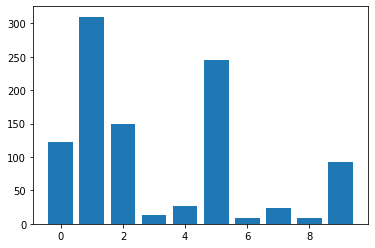

In [38]:
start = time.time()
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
probabilities = [0.12, 0.3, 0.167, 0.024, 0.031,0.23, 0.01, 0.02, 0.008, 0.09]
random = np.random.choice(elements, 1000, p=probabilities)
random_list=list(random)
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [random_list.count(i) for i in range(10)])
plt.show()



### Упорядоченные веса

Time of generation =  0.0009951591491699219


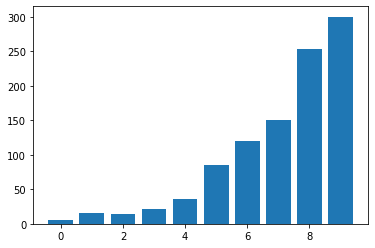

In [39]:
start = time.time()
elements = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
probabilities = [0.12, 0.3, 0.167, 0.024, 0.031,0.23, 0.01, 0.02, 0.008, 0.09]
probabilities.sort()
random = np.random.choice(elements, 1000, p=probabilities)
random_list=list(random)
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [random_list.count(i) for i in range(10)])
plt.show()


### На самом деле алгоритм и так был достаточно оптимизирован, поэтому время не должно сильно меняться; но после оптимизации оно естественно меньше.

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача
Смделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

(array([0.70510754, 0.34890415, 0.1927002 , 0.11240845, 0.0525546 ,
        0.0262773 , 0.0087591 , 0.00729925, 0.0029197 , 0.0029197 ]),
 array([5.19869665e-05, 6.85053878e-01, 1.37005577e+00, 2.05505766e+00,
        2.74005955e+00, 3.42506144e+00, 4.11006333e+00, 4.79506522e+00,
        5.48006711e+00, 6.16506900e+00, 6.85007089e+00]),
 <a list of 10 Patch objects>)

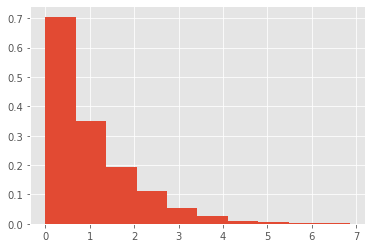

In [83]:
# Solution here
# random.expovariate(0.05)
random = np.random.exponential(1,1000)
plt.hist(random,density=True)


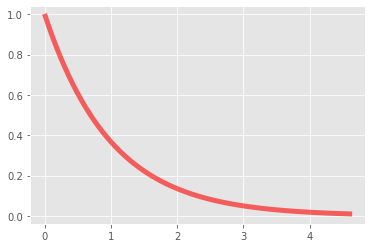

In [108]:
x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 1000)
plt.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='Exp pdf')

### Это были отдельные графики, а теперь совместный.

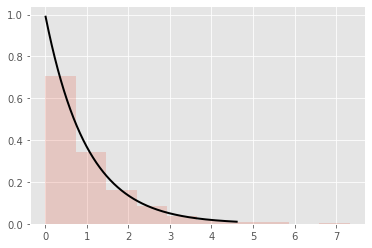

In [123]:
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
# ax.legend(r,loc='best', frameon=False)
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

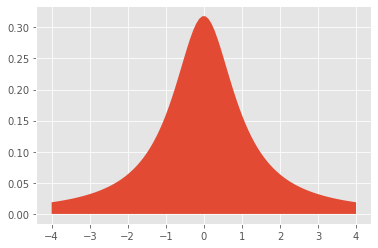

In [152]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

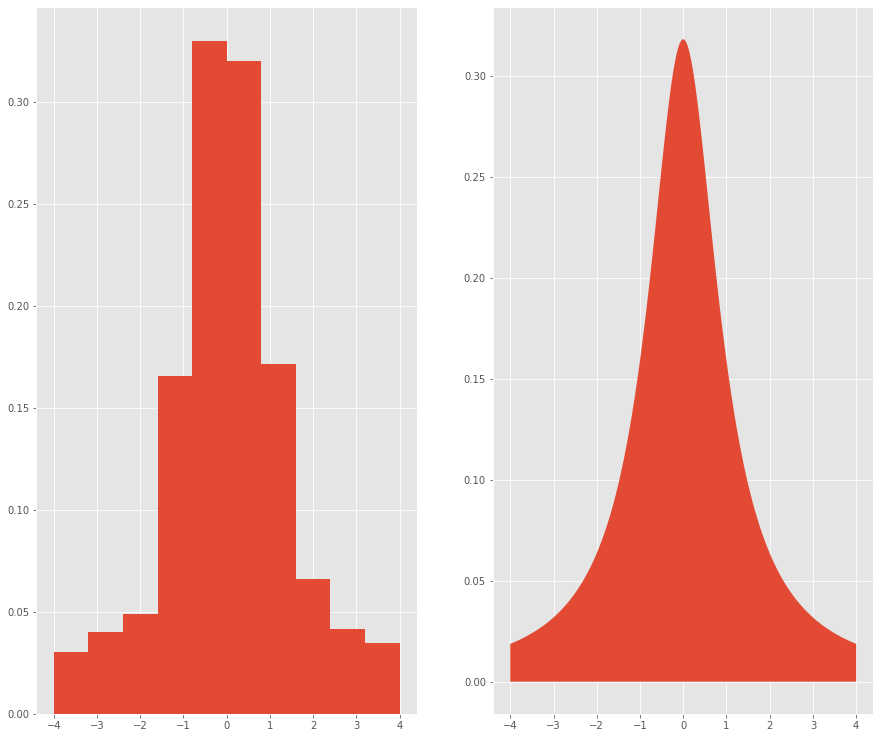

In [168]:
# Solution here
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 1000)

plt.figure(figsize=(15,13))
plt.subplot(1,2,1)

random = np.random.standard_cauchy(1000)
plt.hist(random,range=(-4,4),density=True)

plt.subplot(1,2,2)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()



##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

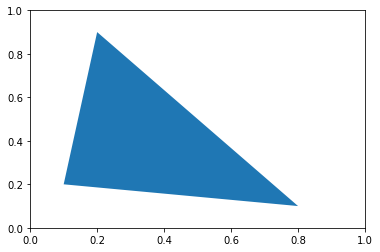

In [0]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

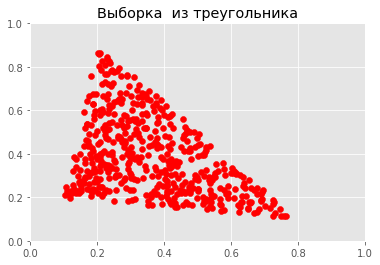

In [158]:
# Solution here
import math

xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1
        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

a = math.atan2(-1, 7)
x = xrand
xrand = xrand*math.cos(a)-yrand*math.sin(a)+0.1
yrand = x*math.sin(a)+yrand*math.cos(a)+0.2

plt.scatter(xrand, yrand,c='red')
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Равномерная выборка из треугольника")
plt.show()


### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

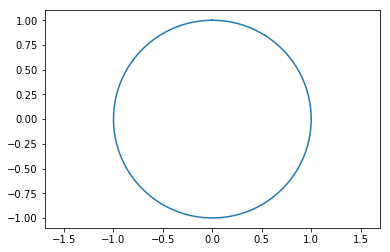

In [0]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

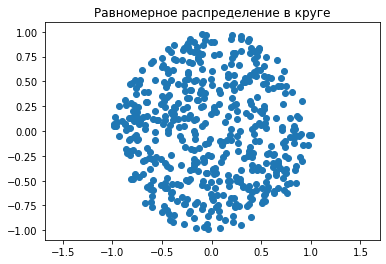

In [2]:
from matplotlib import pyplot as plt
import numpy as np

rho = np.sqrt(np.random.uniform(0, 1, 500))
phi = np.random.uniform(0, 2*np.pi, 500)

x = rho * np.cos(phi)
y = rho * np.sin(phi)

plt.scatter(x, y)
plt.title('Равномерное распределение в круге')
plt.axis('equal')
plt.show()

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [58]:
import pylab
import random
n=100
xindex = np.zeros(100)
yindex = np.zeros(100)
def walk(n):
    xindex = np.random.choice(n, n//2, replace = False)
    yindex = np.random.choice(n, n//2, replace = False)

    x_ = x = np.array([sum([[1,-1][i in xindex] for i in range(n)][:j]) for j in range(n+1)])
    y = np.array([sum([[1,-1][i in yindex] for i in range(n)][:j]) for j in range(n+1)])
    
    x = x_*(1/2)+y*(1/2)
    y = x_*(-1/2)+y*(1/2)
    return x,y


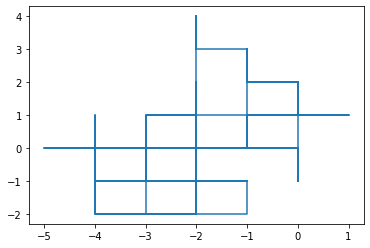

In [78]:
x1,y1 = walk(100)

plt.plot(x1,y1)
plt.show()

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

## Random normal generator

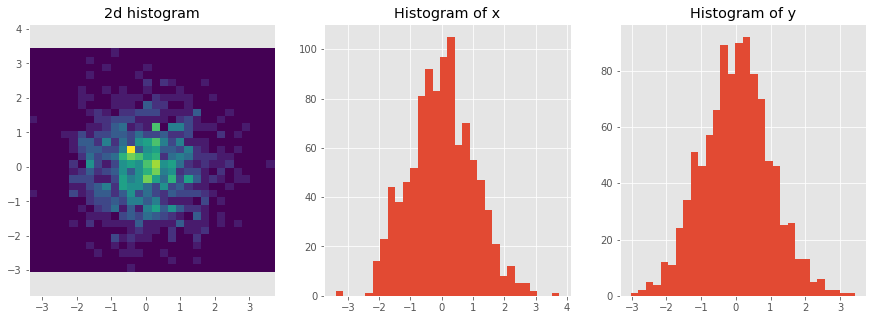

In [301]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

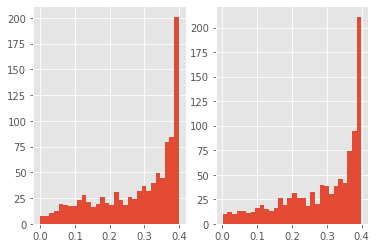

In [304]:
newx = np.sqrt(1/(2*np.pi))*np.exp(-x**2/2)
newy = np.sqrt(1/(2*np.pi))*np.exp(-y**2/2)

plt.subplot(1,2,1)
plt.hist(newx,bins = 30)
plt.subplot(1,2,2)
plt.hist(newy,bins = 30)
plt.show()






#### Построенная гистограма похожа на плотность равномерного распределения на отрезке [0,sqrt(2pi)]. Т.к. изначально было дано не точное нормально распределение, а только приближенное, а при подстановке значений х и у преимущественно получились равномернораспределенные случайные величины(0.4 *=* 1/sqrt(2pi)). Следовательно, можно сделать вывод, что х и у действительно N(0,1). 

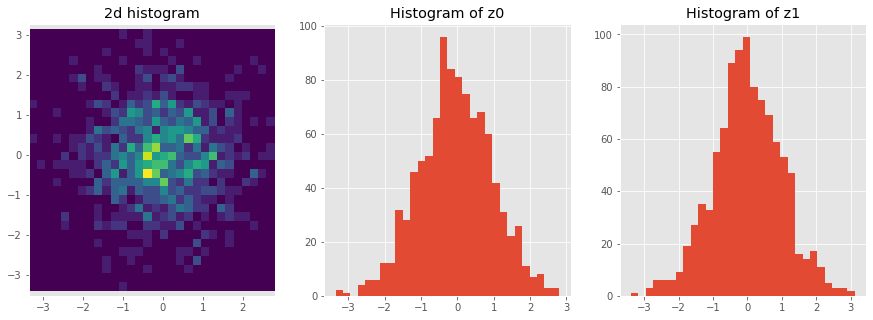

In [310]:
# Solution here
#Модифицируем так, чтобы избавиться от синуса и косинуса
import math
n=1000
i=0
u1 = np.array([])
u2 = np.array([])
while i<n:
    u,v = 2*np.random.rand(2, 1)-1
    s0=u**2+v**2
    if 0<s0<=1:
        u1 = np.append(u1,u)
        u2 = np.append(u2,v)
        i+=1

s = u1**2+u2**2
z0 = u1* np.sqrt((-2*np.log(s))/s)
z1 = u2* np.sqrt((-2*np.log(s))/s)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(z0, z1, bins=30)
ax[0].axis('equal')
ax[1].hist(z0, bins=30)
ax[2].hist(z1, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of z0")
ax[2].set_title("Histogram of z1")
plt.show()

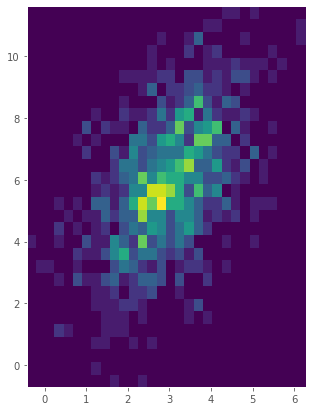

In [332]:
# ksi = a11*z0+a12*z1+3  #Генарация нормальных с.в. из гауссовских
# ette = a21*z0+a22*z1+6
#Далее составляем систему: из того, что D(ksi)=E(ksi-E(ksi))^2
                        #Е(a11*z0+a12*z1)^2=2
                        # E(a21*z0+a22*z1)^2=4
                        # E(a11*z0+a12*z1)*(a21*z0+a22*z1)=1
# т.к. неизвестных 4, а уравнения 3, то для определенности положим а22=0
# E(a21*z0+a22*z1)^2=4 => a21^2 + a22^2 = 4, тогда a21 = 2
# E(a11*z0+a12*z1)*(a21*z0+a22*z1)=1 => a11*a21 + a12*a22 = 1 2*a11=1 => a11=1/2
#Е(a11*z0+a12*z1)^2=2 => a11^2+a12^2=2 a12^2=3/4 
# теперь имея коэффициенты матрицы А можем найти, как ksi и etta выражаются через х и у.

a11=1/2 
a12=math.sqrt(3)/2
a21 = 2 
a22=0

ksi = a11*z0+a12*z1+3  #Генарация нормальных с.в. из гауссовских
etta = a21*z0+a22*z1+6

plt.figure(figsize=(5,7))
plt.hist2d(ksi, etta, bins=30)
plt.show()

## Практическое задание

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [337]:
# Solution here
n = 100
def subsets(n):
    Bells_number = 0
    for k in range(1,100):
        Bells_number+=k**n/np.math.factorial(k)
    Bells_number*=1/np.exp(1)
    part = np.array([k**n/(np.math.factorial(k)*np.exp(1)*Bells_number) for k in range(1,101)])
    summ_p = [part[:i].sum() for i in range(1,101)]
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<summ_p[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    part = np.array([1/r for i in range(r)])
    summ_p = [part[:i].sum() for i in range(1,r+1)]
    a = np.array([np.random.rand() for i in range(n)])
    for i in range(n):
        k=0
        while k!=-1:
            if a[i]<summ_p[k]:
                c.append(k)
                k=-1
            else:
                k+=1

In [338]:
#Оценить ожидаемое число подмножеств можно с помощью ЗБЧ
EX = 0
for i in range(10000):
    c = []
    subsets(n)
    EX+=len(np.unique(c))
EX/=10000
print(EX)

28.6093
